## Debugging the trend calculation

my old version seems to be much more parallel?

I cant reproduce the behavior with the simple example...Keep investigating.

In [84]:
drift_new = ds_control_rechunked.thetao.polyfit('time', 1).polyfit_coefficients.sel(degree=1)
drift_new

<xarray.DataArray 'polyfit_coefficients' (lev: 45, y: 291, x: 360)>
dask.array<getitem, shape=(45, 291, 360), dtype=float64, chunksize=(1, 291, 360), chunktype=numpy.ndarray>
Coordinates:
    degree   int64 1
  * lev      (lev) float64 3.047 9.454 16.36 ... 5.126e+03 5.375e+03 5.625e+03
  * y        (y) int64 0 1 2 3 4 5 6 7 8 ... 282 283 284 285 286 287 288 289 290
  * x        (x) int64 0 1 2 3 4 5 6 7 8 ... 351 352 353 354 355 356 357 358 359

In [89]:
from xarrayutils.utils import linear_trend

drift_old = linear_trend(ds_control_rechunked.thetao, 'time').sel(parameter='slope')
drift_old

/srv/conda/envs/notebook/lib/python3.8/site-packages/xarrayutils/utils.py:85: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  stats = xr.apply_ufunc(


<xarray.DataArray (lev: 45, y: 291, x: 360)>
dask.array<getitem, shape=(45, 291, 360), dtype=float32, chunksize=(1, 291, 3), chunktype=numpy.ndarray>
Coordinates:
    lat        (y, x) float64 dask.array<chunksize=(291, 3), meta=np.ndarray>
  * lev        (lev) float64 3.047 9.454 16.36 ... 5.126e+03 5.375e+03 5.625e+03
    lon        (y, x) float64 dask.array<chunksize=(291, 3), meta=np.ndarray>
  * x          (x) int32 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359
  * y          (y) int32 0 1 2 3 4 5 6 7 8 ... 283 284 285 286 287 288 289 290
    parameter  <U9 'slope'

In [90]:
test = drift_new.isel(**roi)
a = test.data
a.visualize(optimize_graph=True)

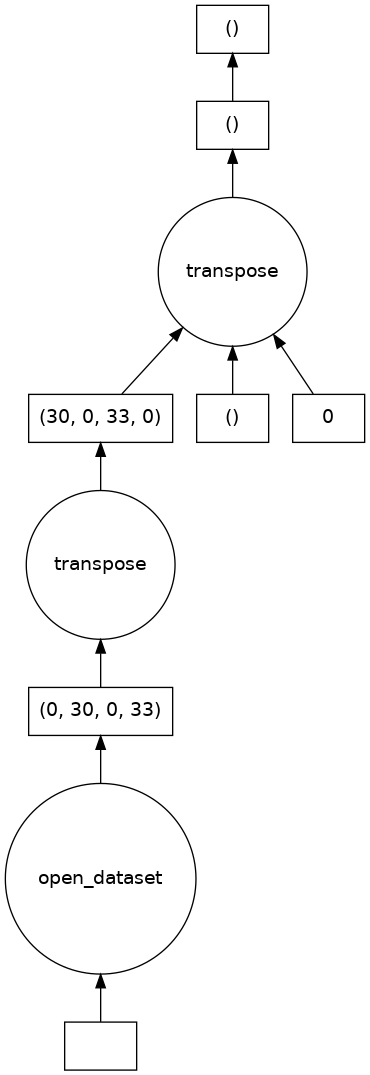

In [91]:
test = drift_old.isel(**roi)
a = test.data
a.visualize(optimize_graph=True)

In [96]:
# xarray issue about polyfit

da = xr.DataArray(np.random.rand(20, 4 ,30), dims=['x', 'y', 'time']).chunk({'x':1, 'y':2})

# calculate linear trend with xarrays polyfit
trend_poly = da.polyfit('time', 1).polyfit_coefficients.sel(degree=1).drop('degree').squeeze()


def naive_linear_trend(da, dim):
    x = xr.DataArray(np.arange(len(da[dim])), dims=[dim])
    y = da
    n = len(da.time)
    
    xmean = x.mean(dim)
    ymean = y.mean(dim)
    xstd = x.std(dim)
    ystd = y.std(dim)

    cov = ((x - xmean) * (y - ymean)).sum(dim) / (n)
    cor = cov / (xstd * ystd)

    slope = cov / (xstd ** 2)
    return slope

trend = naive_linear_trend(da, 'time')

# confirm that the results are the same

# np.testing.assert_allclose(trend.load().data, trend_poly.load().data)

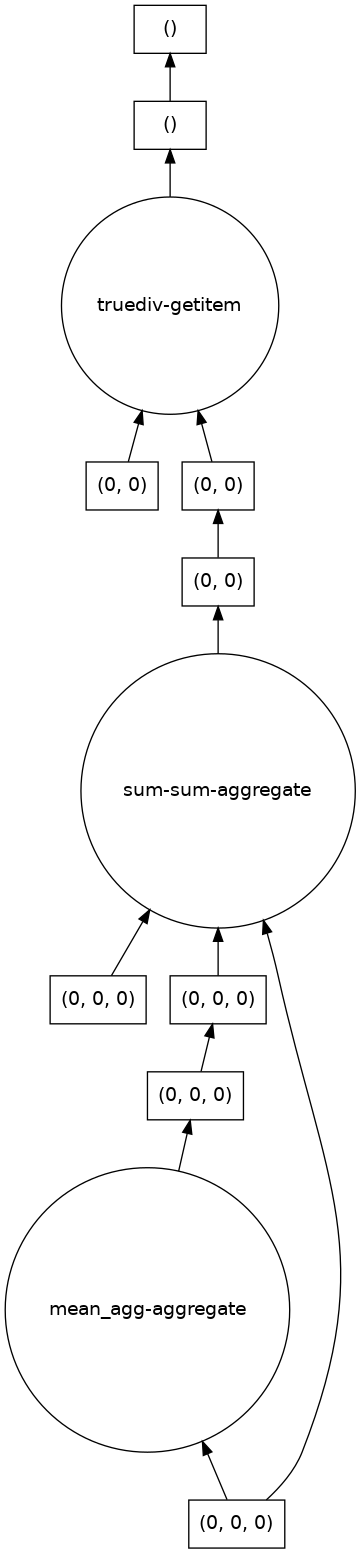

In [101]:
trend.isel(x=0, y=0).data.visualize(optimize_graph=True)

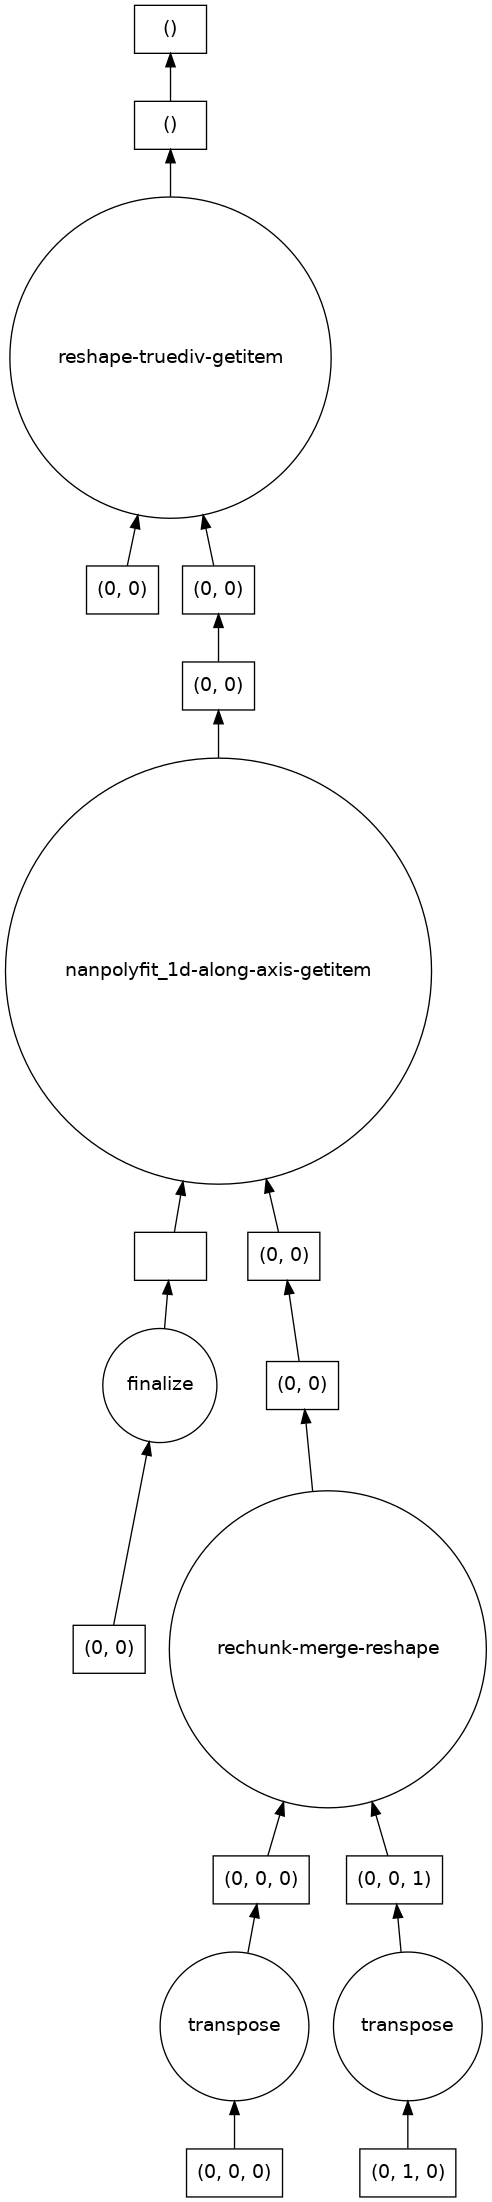

In [102]:
trend_poly.isel(x=0, y=0).data.visualize(optimize_graph=True)

In [53]:
# test = drift.isel(**roi).thetao#.load(a)
test = ds_control_rechunked.thetao.polyfit('time', 1).isel(**roi)
a = test.polyfit_coefficients.sel(degree=1).data
a.visualize(optimize_graph=True)
# test

In [38]:
drift.isel(**roi).load()

KeyboardInterrupt: 